Update sqlite3

In [ ]:
!gdown --id 1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
!mv _sqlite3.cpython-37m-x86_64-linux-gnu.so /usr/lib/python3.7/lib-dynload/
import os
os.kill(os.getpid(), 9)

Downloading...
From: https://drive.google.com/uc?id=1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
To: /content/_sqlite3.cpython-37m-x86_64-linux-gnu.so
100% 6.33M/6.33M [00:00<00:00, 53.5MB/s]


# Import библиотек

In [1]:
import sqlite3

In [2]:
sqlite3.sqlite_version

'3.36.0'

In [3]:
import pandas as pd
import numpy as np

# Загрузка данных

https://drive.google.com/file/d/1UqnTOtxiXVvbuR1PQ-I22icQDg_nq_Ov/view?usp=sharing

In [4]:
!gdown --id 1UqnTOtxiXVvbuR1PQ-I22icQDg_nq_Ov

Downloading...
From: https://drive.google.com/uc?id=1UqnTOtxiXVvbuR1PQ-I22icQDg_nq_Ov
To: /content/e_commerce_data.csv
100% 45.6M/45.6M [00:00<00:00, 97.9MB/s]


In [5]:
df = pd.read_csv('/content/e_commerce_data.csv', encoding='cp1252')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'],format='%m/%d/%Y %H:%M')

# Подключение

In [11]:
conn = sqlite3.connect('db')
cur = conn.cursor()

In [12]:
def select(sql):
  return pd.read_sql(sql,conn)

In [13]:
df.to_sql('ecommerce',conn,index=False,if_exists='replace')

In [14]:
sql = '''select count(*) from ecommerce t'''

In [15]:
select(sql)

,count(*)
0,541909


In [16]:
len(df)

541909

# Анализ

**recency frequence monetary**

* r (Как давно что-то покупал? Чем более недавно, тем лучше) 1-4
* f (Как часто покупал ранее? Чем чаще, тем лучше) 1-4 /br
* m (Как много денег потратил на покупку? Чем больше, тем лучше) 1-4 /br


rfm = (r + f + m) / 3

111 113 122

In [17]:
sql = '''
SELECT
  DATE(t.invoicedate,'start of month'),
  COUNT(*)
FROM 
  ecommerce t 
group by 
  1
ORDER BY 
  1
'''

In [18]:
select(sql)

,"DATE(t.invoicedate,'start of month')",COUNT(*)
0,2010-12-01,42481
1,2011-01-01,35147
2,2011-02-01,27707
3,2011-03-01,36748
4,2011-04-01,29916
5,2011-05-01,37030
6,2011-06-01,36874
7,2011-07-01,39518
8,2011-08-01,35284
9,2011-09-01,50226


In [19]:
sql = '''
SELECT 
  MAX(t.invoicedate) 
FROM 
  ecommerce t'''

In [20]:
select(sql)

,MAX(t.invoicedate)
0,2011-12-09 12:50:00


In [21]:
sql = '''
SELECT
  t.customerid,
  MIN(t.invoicedate) AS reg_date,
  SUM(t.quantity * t.unitprice) AS revenue
FROM
  ecommerce t 
WHERE 
  DATE(t.invoicedate, 'start of month') <= '2011-10-01'
  AND t.customerid IS NOT NULL
GROUP BY 
  1
'''

In [22]:
select(sql)

,customerid,reg_date,revenue
0,12346.0,2011-01-18 10:01:00,0.00
1,12347.0,2010-12-07 14:57:00,4085.18
2,12348.0,2010-12-16 19:09:00,1797.24
3,12350.0,2011-02-02 16:01:00,334.40
4,12352.0,2011-02-16 12:33:00,1233.68
...,...,...,...
4005,18280.0,2011-03-07 09:52:00,180.60
4006,18281.0,2011-06-12 10:53:00,80.82
4007,18282.0,2011-08-05 13:35:00,98.76
4008,18283.0,2011-01-06 14:14:00,1235.32


In [23]:
t = select(sql)

In [24]:
t

,customerid,reg_date,revenue
0,12346.0,2011-01-18 10:01:00,0.00
1,12347.0,2010-12-07 14:57:00,4085.18
2,12348.0,2010-12-16 19:09:00,1797.24
3,12350.0,2011-02-02 16:01:00,334.40
4,12352.0,2011-02-16 12:33:00,1233.68
...,...,...,...
4005,18280.0,2011-03-07 09:52:00,180.60
4006,18281.0,2011-06-12 10:53:00,80.82
4007,18282.0,2011-08-05 13:35:00,98.76
4008,18283.0,2011-01-06 14:14:00,1235.32


In [25]:
from matplotlib import style
style.use('grayscale')

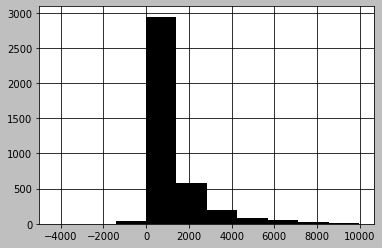

In [26]:
t[t['revenue']<10000]['revenue'].hist()

In [27]:
t[t['revenue']<50000].median()

customerid    15276.00
revenue         602.09
dtype: float64

In [28]:
t[t['revenue'] < 0]

,customerid,reg_date,revenue
81,12454.0,2011-10-14 17:13:00,-5.684342e-14
114,12503.0,2011-01-06 11:51:00,-1.126000e+03
115,12505.0,2011-02-11 13:39:00,-4.500000e+00
176,12586.0,2010-12-06 09:31:00,-1.700000e+01
192,12605.0,2010-12-09 15:41:00,-7.500000e+00
237,12666.0,2010-12-15 14:42:00,-2.274400e+02
382,12870.0,2010-12-08 14:27:00,-1.490000e+01
429,12943.0,2011-02-11 15:13:00,-3.750000e+00
569,13154.0,2011-07-18 15:21:00,-6.118600e+02
918,13672.0,2011-01-10 12:02:00,-7.146000e+01


In [29]:
len(t[t['revenue']<10000]['revenue']) / len(t)

0.9812967581047382

In [30]:
sql = '''

DROP TABLE IF EXISTS customer;

CREATE TABLE customer AS

SELECT 
  t.*,
  date('2011-11-01') AS month,
  JULIANDAY(DATE('2011-11-01')) - JULIANDAY(t.last_purchase) AS recency
FROM
  (SELECT
    t.customerid,
    MIN(t.invoicedate) AS reg_date,
    MAX(t.invoicedate) AS last_purchase,
    SUM(t.quantity * t.unitprice) AS monetary,
    COUNT(DISTINCT t.invoiceno) AS frequency
  FROM 
    ecommerce t 
  WHERE 
    DATE(t.invoicedate,'start of month') <= '2011-10-01'
    AND t.customerid IS NOT NULL
  GROUP BY 
    1) t
WHERE 
  t.monetary < 10000
'''

In [31]:
cur.executescript(sql)

In [32]:
sql = '''
SELECT 
  t.customerid, 
  SUM(t.quantity * t.unitprice) AS target 
FROM 
  ecommerce t
WHERE 
  DATE(t.invoicedate, 'start of month') == '2011-11-01'
GROUP BY  
  1
'''

In [33]:
select(sql)

,customerid,target
0,NaN,3.293485e+05
1,12349.0,1.757550e+03
2,12352.0,3.117300e+02
3,12356.0,5.835000e+01
4,12357.0,6.207670e+03
...,...,...
1707,18263.0,3.996800e+02
1708,18270.0,1.712000e+02
1709,18274.0,1.243450e-14
1710,18276.0,-1.250000e+01


In [34]:
sql = '''
SELECT
   t.*, 
   n.target 
FROM 
  customer t
LEFT JOIN 
  (SELECT 
    t.customerid, 
    SUM(t.quantity * t.unitprice) AS target 
   FROM 
    ecommerce t
   WHERE 
    DATE(t.invoicedate, 'start of month') == '2011-11-01'
   group by  
    1) 
  n ON t.customerid = n.customerid
'''

In [35]:
select(sql)

,customerid,reg_date,last_purchase,monetary,frequency,month,recency,target
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00,0.00,2,2011-11-01,286.571528,NaN
1,12347.0,2010-12-07 14:57:00,2011-10-31 12:25:00,4085.18,6,2011-11-01,0.482639,NaN
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,1797.24,4,2011-11-01,36.449306,NaN
3,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,334.40,1,2011-11-01,271.332639,NaN
4,12352.0,2011-02-16 12:33:00,2011-09-28 14:58:00,1233.68,10,2011-11-01,33.376389,311.73
...,...,...,...,...,...,...,...,...
3930,18280.0,2011-03-07 09:52:00,2011-03-07 09:52:00,180.60,1,2011-11-01,238.588889,NaN
3931,18281.0,2011-06-12 10:53:00,2011-06-12 10:53:00,80.82,1,2011-11-01,141.546528,NaN
3932,18282.0,2011-08-05 13:35:00,2011-08-09 15:10:00,98.76,2,2011-11-01,83.368056,NaN
3933,18283.0,2011-01-06 14:14:00,2011-10-27 14:38:00,1235.32,11,2011-11-01,4.390278,651.56


In [36]:
t = select(sql)

In [37]:
t

,customerid,reg_date,last_purchase,monetary,frequency,month,recency,target
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00,0.00,2,2011-11-01,286.571528,NaN
1,12347.0,2010-12-07 14:57:00,2011-10-31 12:25:00,4085.18,6,2011-11-01,0.482639,NaN
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,1797.24,4,2011-11-01,36.449306,NaN
3,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,334.40,1,2011-11-01,271.332639,NaN
4,12352.0,2011-02-16 12:33:00,2011-09-28 14:58:00,1233.68,10,2011-11-01,33.376389,311.73
...,...,...,...,...,...,...,...,...
3930,18280.0,2011-03-07 09:52:00,2011-03-07 09:52:00,180.60,1,2011-11-01,238.588889,NaN
3931,18281.0,2011-06-12 10:53:00,2011-06-12 10:53:00,80.82,1,2011-11-01,141.546528,NaN
3932,18282.0,2011-08-05 13:35:00,2011-08-09 15:10:00,98.76,2,2011-11-01,83.368056,NaN
3933,18283.0,2011-01-06 14:14:00,2011-10-27 14:38:00,1235.32,11,2011-11-01,4.390278,651.56


# RFM

recency frequence monetary

r (Как давно что-то покупал? Чем более недавно, тем лучше) 1-4

f (Как часто покупал ранее? Чем чаще, тем лучше) 1-4 

m (Как много денег потратил на покупку? Чем больше, тем лучше) 1-4

rfm = (r + f + m) / 3

## Recency

In [38]:
t['r'] = 5 - (pd.qcut(t['recency'], 4, labels=False) + 1)

In [39]:
t.groupby('r')['recency'].agg(['mean','count'])

,mean,count
r,,
1,238.929315,984
2,97.578577,983
3,34.175226,984
4,9.272108,984


## Frequency

In [40]:
t['frequency'].value_counts()

1     1339
2      777
3      461
4      317
5      262
6      152
7      115
8       96
9       66
10      62
11      55
13      34
12      33
14      27
15      21
16      20
17      13
19      10
20       9
24       9
21       8
18       8
25       7
23       6
22       5
26       4
28       3
31       3
35       2
38       2
40       2
34       1
36       1
33       1
76       1
27       1
29       1
74       1
Name: frequency, dtype: int64

In [41]:
t['f'] = pd.qcut(t['frequency'], 4, labels=False, duplicates='drop') + 2

In [42]:
t.groupby('f')['frequency'].agg(set)

f
2                                               {1, 2}
3                                            {3, 4, 5}
4    {6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...
Name: frequency, dtype: object

In [43]:
def get_f(x):
  if x == 1:
    return 1
  if x in [2,3]:
    return 2
  if x in [3,4,5,6]:
    return 3
  return 4

In [44]:
t['f'] = t['frequency'].apply(get_f)

In [45]:
t.groupby('f')['frequency'].agg(['mean', 'count'])

,mean,count
f,,
1,1.000000,1339
2,2.372375,1238
3,4.774282,731
4,12.122807,627


## Monetary

In [46]:
t['m'] = pd.qcut(t['monetary'], 4, labels=False) + 1

In [47]:
t.groupby('m')['monetary'].agg(['mean', 'count'])

,mean,count
m,,
1,138.807317,984
2,401.886477,984
3,894.042645,983
4,3012.871109,984


## RFM score

In [48]:
t['rfm_score'] = (t['r'] + t['f'] + t['m']) / 3

In [49]:
t

,customerid,reg_date,last_purchase,monetary,frequency,month,recency,target,r,f,m,rfm_score
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00,0.00,2,2011-11-01,286.571528,NaN,1,2,1,1.333333
1,12347.0,2010-12-07 14:57:00,2011-10-31 12:25:00,4085.18,6,2011-11-01,0.482639,NaN,4,3,4,3.666667
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,1797.24,4,2011-11-01,36.449306,NaN,3,3,4,3.333333
3,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,334.40,1,2011-11-01,271.332639,NaN,1,1,2,1.333333
4,12352.0,2011-02-16 12:33:00,2011-09-28 14:58:00,1233.68,10,2011-11-01,33.376389,311.73,3,4,3,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
3930,18280.0,2011-03-07 09:52:00,2011-03-07 09:52:00,180.60,1,2011-11-01,238.588889,NaN,1,1,1,1.000000
3931,18281.0,2011-06-12 10:53:00,2011-06-12 10:53:00,80.82,1,2011-11-01,141.546528,NaN,2,1,1,1.333333
3932,18282.0,2011-08-05 13:35:00,2011-08-09 15:10:00,98.76,2,2011-11-01,83.368056,NaN,2,2,1,1.666667
3933,18283.0,2011-01-06 14:14:00,2011-10-27 14:38:00,1235.32,11,2011-11-01,4.390278,651.56,4,4,3,3.666667


In [50]:
t.sort_values('rfm_score', ascending = False)

,customerid,reg_date,last_purchase,monetary,frequency,month,recency,target,r,f,m,rfm_score
1172,14085.0,2010-12-06 12:39:00,2011-10-25 16:20:00,3525.98,15,2011-11-01,6.319444,278.82,4,4,4,4.0
1187,14112.0,2011-03-09 11:28:00,2011-10-30 16:00:00,2613.15,10,2011-11-01,1.333333,161.02,4,4,4,4.0
2113,15505.0,2011-07-07 13:33:00,2011-10-18 07:56:00,3497.14,7,2011-11-01,13.669444,NaN,4,4,4,4.0
2098,15482.0,2010-12-16 10:08:00,2011-10-25 17:32:00,2503.50,8,2011-11-01,6.269444,4065.22,4,4,4,4.0
3337,17365.0,2011-01-11 12:11:00,2011-10-20 12:07:00,4375.19,7,2011-11-01,11.495139,426.37,4,4,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2475,16061.0,2011-03-15 14:41:00,2011-03-15 14:41:00,-29.95,1,2011-11-01,230.388194,NaN,1,1,1,1.0
3533,17670.0,2011-04-26 09:12:00,2011-04-26 09:12:00,205.70,1,2011-11-01,188.616667,NaN,1,1,1,1.0
2484,16078.0,2011-03-01 09:47:00,2011-03-01 09:47:00,79.20,1,2011-11-01,244.592361,NaN,1,1,1,1.0
2497,16097.0,2011-04-13 13:47:00,2011-04-13 13:47:00,185.05,1,2011-11-01,201.425694,NaN,1,1,1,1.0


## RFM SCORE segments

https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17

In [51]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [52]:
t['RFM_Score'] = (t['r'] + t['f'] + t['m'])

In [53]:
t['segment'] = t.apply(rfm_level, axis=1)

In [54]:
t.groupby('segment')['monetary'].agg(['mean','count'])

,mean,count
segment,,
Can't Loose Them,2399.799870,1307
Champions,979.344811,418
Loyal,656.788071,476
Needs Attention,230.661849,438
Potential,456.758162,500
Promising,332.846186,409
Require Activation,133.005271,387


recency frequency monetary

r (как давно что-то покупал? Чем более недавно, тем лучше) 1-4

f (как часто покупал ранее? Чем чаще, тем лучше) 1-4

m (как много денег потратил на нас? Чем больше, тем лучше) 1-4

In [55]:
t['recency'].rank(pct=True,ascending=False)

0       0.055909
1       0.992630
2       0.593393
3       0.077510
4       0.628208
          ...   
3930    0.113850
3931    0.275476
3932    0.400508
3933    0.940661
3934    0.952732
Name: recency, Length: 3935, dtype: float64

In [56]:
d = pd.DataFrame([1,2,3,4,4,4,5,6])

In [57]:
d['rnk'] = d[0].rank(method='max')

In [58]:
d

,0,rnk
0,1,1.0
1,2,2.0
2,3,3.0
3,4,6.0
4,4,6.0
5,4,6.0
6,5,7.0
7,6,8.0


In [59]:
t['r_pct'] = t['recency'].rank(pct=True, ascending=False)
t['f_pct'] = t['frequency'].rank(pct=True)
t['m_pct'] = t['monetary'].rank(pct=True)

In [60]:
t['rfm_pct'] = t[['r_pct','f_pct','m_pct']].sum(axis = 1)

# axis = 1 сложение по столбцам

In [61]:
t

,customerid,reg_date,last_purchase,monetary,frequency,month,recency,target,r,f,m,rfm_score,RFM_Score,segment,r_pct,f_pct,m_pct,rfm_pct
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00,0.00,2,2011-11-01,286.571528,NaN,1,2,1,1.333333,4,Needs Attention,0.055909,0.439136,0.012706,0.507751
1,12347.0,2010-12-07 14:57:00,2011-10-31 12:25:00,4085.18,6,2011-11-01,0.482639,NaN,4,3,4,3.666667,11,Can't Loose Them,0.992630,0.821474,0.950445,2.764549
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,1797.24,4,2011-11-01,36.449306,NaN,3,3,4,3.333333,10,Can't Loose Them,0.593393,0.695299,0.816773,2.105464
3,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,334.40,1,2011-11-01,271.332639,NaN,1,1,2,1.333333,4,Needs Attention,0.077510,0.170267,0.326048,0.573825
4,12352.0,2011-02-16 12:33:00,2011-09-28 14:58:00,1233.68,10,2011-11-01,33.376389,311.73,3,4,3,3.333333,10,Can't Loose Them,0.628208,0.919060,0.723761,2.271029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,18280.0,2011-03-07 09:52:00,2011-03-07 09:52:00,180.60,1,2011-11-01,238.588889,NaN,1,1,1,1.000000,3,Require Activation,0.113850,0.170267,0.155527,0.439644
3931,18281.0,2011-06-12 10:53:00,2011-06-12 10:53:00,80.82,1,2011-11-01,141.546528,NaN,2,1,1,1.333333,4,Needs Attention,0.275476,0.170267,0.039898,0.485642
3932,18282.0,2011-08-05 13:35:00,2011-08-09 15:10:00,98.76,2,2011-11-01,83.368056,NaN,2,2,1,1.666667,5,Promising,0.400508,0.439136,0.052605,0.892249
3933,18283.0,2011-01-06 14:14:00,2011-10-27 14:38:00,1235.32,11,2011-11-01,4.390278,651.56,4,4,3,3.666667,11,Can't Loose Them,0.940661,0.933926,0.724269,2.598856


# RFM sql

## Recency

In [62]:
sql = '''
SELECT 
  t.r,
  COUNT(*) 
FROM
  (SELECT 
    t.*,
    NTILE(4) OVER (ORDER BY t.recency DESC) AS r
   FROM
    customer t) t
GROUP BY 
  1
 '''

In [63]:
select(sql)

,r,COUNT(*)
0,1,984
1,2,984
2,3,984
3,4,983


# Pivot table RFM

In [64]:
t.pivot_table(index='f',columns='r',values='monetary',aggfunc='sum')

r,1,2,3,4
f,,,,
1,173455.080,93840.87,103849.131,71046.26
2,149795.381,266158.92,234848.141,201137.25
3,63802.860,287989.92,386605.081,346290.83
4,27635.610,230306.10,639572.730,1099217.62


In [65]:
t.groupby(['f','r'])['monetary'].sum().reset_index()

,f,r,monetary
0,1,1,173455.080
1,1,2,93840.870
2,1,3,103849.131
3,1,4,71046.260
4,2,1,149795.381
5,2,2,266158.920
6,2,3,234848.141
7,2,4,201137.250
8,3,1,63802.860
9,3,2,287989.920


# Visual

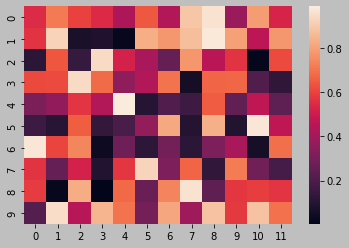

In [66]:
import numpy as np; np.random.seed(0)
import seaborn as sns
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

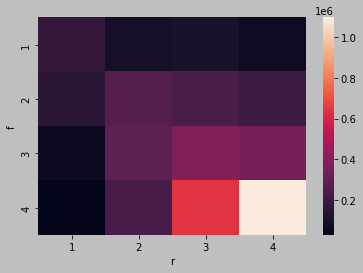

In [67]:
sns.heatmap(t.pivot_table(index='f',columns='r',values='monetary',aggfunc='sum'))

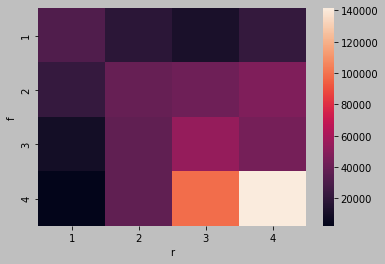

In [68]:
sns.heatmap(t.pivot_table(index='f',columns='r',values='target',aggfunc='sum'))

In [69]:
t['has_purchase'] = (t['target'] > 0) * 1

In [70]:
t['has_purchase'].mean()

0.3232528589580686

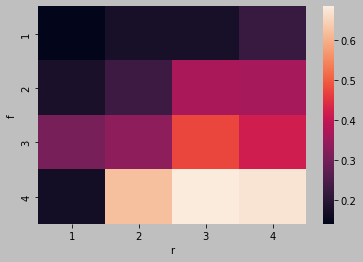

In [71]:
sns.heatmap(t.pivot_table(index='f',columns='r',values='has_purchase',aggfunc='mean'))

In [72]:
t.pivot_table(index='f',columns='r',values='has_purchase',aggfunc='mean')

r,1,2,3,4
f,,,,
1,0.139647,0.175258,0.173729,0.222222
2,0.175862,0.225131,0.367893,0.363296
3,0.305085,0.334884,0.474359,0.417040
4,0.166667,0.621053,0.683721,0.672131


In [73]:
t['has_purchase'].sum()

1272

In [74]:
len(t)

3935

In [75]:
t.sample(frac=0.2)['has_purchase'].sum()/t['has_purchase'].sum()

0.20125786163522014

In [76]:
t.sort_values('rfm_score', ascending=False, inplace=True)

In [77]:
t

,customerid,reg_date,last_purchase,monetary,frequency,month,recency,target,r,f,m,rfm_score,RFM_Score,segment,r_pct,f_pct,m_pct,rfm_pct,has_purchase
1172,14085.0,2010-12-06 12:39:00,2011-10-25 16:20:00,3525.98,15,2011-11-01,6.319444,278.82,4,4,4,4.0,12,Can't Loose Them,0.908259,0.967471,0.934435,2.810165,1
1187,14112.0,2011-03-09 11:28:00,2011-10-30 16:00:00,2613.15,10,2011-11-01,1.333333,161.02,4,4,4,4.0,12,Can't Loose Them,0.984244,0.919060,0.889962,2.793266,1
2113,15505.0,2011-07-07 13:33:00,2011-10-18 07:56:00,3497.14,7,2011-11-01,13.669444,NaN,4,4,4,4.0,12,Can't Loose Them,0.809911,0.855400,0.933418,2.598729,0
2098,15482.0,2010-12-16 10:08:00,2011-10-25 17:32:00,2503.50,8,2011-11-01,6.269444,4065.22,4,4,4,4.0,12,Can't Loose Them,0.909530,0.882211,0.883100,2.674841,1
3337,17365.0,2011-01-11 12:11:00,2011-10-20 12:07:00,4375.19,7,2011-11-01,11.495139,426.37,4,4,4,4.0,12,Can't Loose Them,0.844473,0.855400,0.957814,2.657687,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,16061.0,2011-03-15 14:41:00,2011-03-15 14:41:00,-29.95,1,2011-11-01,230.388194,NaN,1,1,1,1.0,3,Require Activation,0.125794,0.170267,0.007116,0.303177,0
3533,17670.0,2011-04-26 09:12:00,2011-04-26 09:12:00,205.70,1,2011-11-01,188.616667,NaN,1,1,1,1.0,3,Require Activation,0.191105,0.170267,0.181703,0.543075,0
2484,16078.0,2011-03-01 09:47:00,2011-03-01 09:47:00,79.20,1,2011-11-01,244.592361,NaN,1,1,1,1.0,3,Require Activation,0.104956,0.170267,0.038374,0.313596,0
2497,16097.0,2011-04-13 13:47:00,2011-04-13 13:47:00,185.05,1,2011-11-01,201.425694,NaN,1,1,1,1.0,3,Require Activation,0.174079,0.170267,0.159085,0.503431,0
